### Jupyter Notebook Code Formatter

pip install nb_black

In [13]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import time

## Detect Faces from Video

Configuration Options
Naming style and availability may differ slightly across platforms/languages.

MODEL_SELECTION
An integer index 0 or 1. Use 0 to select a short-range model that works best for faces within 2 meters from the camera, and 1 for a full-range model best for faces within 5 meters. For the full-range option, a sparse model is used for its improved inference speed. Please refer to the model cards for details. Default to 0 if not specified.

MIN_DETECTION_CONFIDENCE
Minimum confidence value ([0.0, 1.0]) from the face detection model for the detection to be considered successful. Default to 0.5.

 The cv2.getTickCount() function returns us the count of clock signals that was sent from the reference event to the time cv2.getTickCount() function is called. The reference event may be anything such as the moment when the computer was turned on

 The cv2.getTickFrequency() function returns the number of clock signals sent in a second, which can also be called as getTickFrequency

 To calculate the time a block of code takes to execute, we can calculate the number of clock signals using cv2.getTickCount() at the beginning and the end of the block of code and divide its difference by the frequency, which can be obtained using the cv2.getTickFrequency() function.

 In this example, let us try to perform some basic OpenCV manipulations such as converting the image to grayscale and drawing a rectangle 

In [2]:
face_detection = mp.solutions.face_detection.FaceDetection()

# mp_draw = mp.solutions.drawing_utils

cap_video = cv2.VideoCapture("Videos/smilegirl-2.mp4")

# cap_video = cv2.VideoCapture(0)

width, height = 700, 700

pTime = 0

while cap_video.isOpened():
    success, img = cap_video.read()
    
    if success == True:
        timer = cv2.getTickCount()
        
        imgRGB = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)

        # Syntax: face_detection.process(image: numpy.ndarray)
        results = face_detection.process(image=imgRGB)

        print("Results.detection: ",results.detections)
        print("*"*35)
        
        if results.detections:
            for idNum, detection in enumerate(results.detections):
                print("IDNum: ", idNum)
                print("*"*35)
                print("Detection: ", detection)
                print("*"*35)
                print("score: ", detection.score)
                print("*"*35)
                print("Relative bounding box: ",detection.location_data.relative_bounding_box)
                print("*"*35)
                
                extract_bbox = detection.location_data.relative_bounding_box
                
                print("extract_bbox: ", extract_bbox)
                print("*"*35)
                
                imgHeight, imgWidth, imgChennel = img.shape
                print("imgHeight, imgWidht, imgChennel: ", imgHeight, imgWidth, imgChennel)
                print("*"*35)
                
                # we have to use pixel value not normalize value so we do that operations to achieve the pixel value
                bbox = int(extract_bbox.xmin * imgWidth), int(extract_bbox.ymin * imgHeight),\
                       int(extract_bbox.width * imgWidth), int(extract_bbox.height * imgHeight)
                
                print("The bbox: ",bbox)
                print("*"*35)
                
                cv2.rectangle(img, bbox, (0,255,255), 2)

                
                cv2.putText(img=img, text=f"{int(detection.score[0]*100)}%",
                            org=(bbox[0], bbox[1]-20), fontFace=cv2.FONT_HERSHEY_PLAIN,
                            fontScale=2, color=(0,255,255), thickness=2)
        
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
        
        cv2.putText(img=img, text=f"FPS: {int(fps)}", org=(35,70), fontFace=cv2.FONT_HERSHEY_PLAIN,
                    fontScale=2,color=(0,255,0), thickness=2)
                
        img_resize = cv2.resize(src=img, dsize=(width, height))
        
        cv2.imshow(winname="My Face", mat=img_resize)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


cap_video.release()
cv2.destroyAllWindows()

Results.detection:  [label_id: 0
score: 0.953169584274292
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3430361747741699
    ymin: 0.22641795873641968
    width: 0.2401423454284668
    height: 0.42691874504089355
  }
  relative_keypoints {
    x: 0.4172504246234894
    y: 0.33513063192367554
  }
  relative_keypoints {
    x: 0.5186797380447388
    y: 0.3344087600708008
  }
  relative_keypoints {
    x: 0.47194233536720276
    y: 0.42657381296157837
  }
  relative_keypoints {
    x: 0.47029128670692444
    y: 0.5202861428260803
  }
  relative_keypoints {
    x: 0.35368508100509644
    y: 0.38794147968292236
  }
  relative_keypoints {
    x: 0.5708720088005066
    y: 0.3874710202217102
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.953169584274292
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3430361747741699
    ymin: 0.2264179587364

imgHeight, imgWidht, imgChennel:  720 1280 3
***********************************
The bbox:  (441, 155, 302, 302)
***********************************
Results.detection:  [label_id: 0
score: 0.9603329300880432
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.34408989548683167
    ymin: 0.21586370468139648
    width: 0.23317763209342957
    height: 0.41453856229782104
  }
  relative_keypoints {
    x: 0.4133666753768921
    y: 0.3166343569755554
  }
  relative_keypoints {
    x: 0.5137895345687866
    y: 0.3235945701599121
  }
  relative_keypoints {
    x: 0.46299049258232117
    y: 0.4080137014389038
  }
  relative_keypoints {
    x: 0.4603184163570404
    y: 0.5006595253944397
  }
  relative_keypoints {
    x: 0.35309168696403503
    y: 0.3654201030731201
  }
  relative_keypoints {
    x: 0.5673153400421143
    y: 0.38022661209106445
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
scor

Results.detection:  [label_id: 0
score: 0.9610866904258728
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3390960395336151
    ymin: 0.2086964249610901
    width: 0.22924938797950745
    height: 0.40755486488342285
  }
  relative_keypoints {
    x: 0.4092949628829956
    y: 0.30975908041000366
  }
  relative_keypoints {
    x: 0.5079807639122009
    y: 0.3115607500076294
  }
  relative_keypoints {
    x: 0.46241775155067444
    y: 0.39651167392730713
  }
  relative_keypoints {
    x: 0.46028971672058105
    y: 0.4878646731376648
  }
  relative_keypoints {
    x: 0.34565675258636475
    y: 0.36209505796432495
  }
  relative_keypoints {
    x: 0.5576688647270203
    y: 0.3649928569793701
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9610866904258728
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3390960395336151
    ymin: 0.20869642496

Results.detection:  [label_id: 0
score: 0.9532482028007507
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3312740921974182
    ymin: 0.19207030534744263
    width: 0.2381826639175415
    height: 0.42343664169311523
  }
  relative_keypoints {
    x: 0.40350720286369324
    y: 0.29605019092559814
  }
  relative_keypoints {
    x: 0.5065308213233948
    y: 0.3070632815361023
  }
  relative_keypoints {
    x: 0.4549330770969391
    y: 0.39378100633621216
  }
  relative_keypoints {
    x: 0.4509076476097107
    y: 0.48606228828430176
  }
  relative_keypoints {
    x: 0.33837512135505676
    y: 0.3407067060470581
  }
  relative_keypoints {
    x: 0.5582614541053772
    y: 0.3634817600250244
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9532482028007507
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3312740921974182
    ymin: 0.192070305347

Results.detection:  [label_id: 0
score: 0.9594898819923401
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32631614804267883
    ymin: 0.18846583366394043
    width: 0.2487511932849884
    height: 0.44222491979599
  }
  relative_keypoints {
    x: 0.40574315190315247
    y: 0.2934498190879822
  }
  relative_keypoints {
    x: 0.5097789764404297
    y: 0.315598726272583
  }
  relative_keypoints {
    x: 0.45488178730010986
    y: 0.404278039932251
  }
  relative_keypoints {
    x: 0.44729894399642944
    y: 0.4982612133026123
  }
  relative_keypoints {
    x: 0.3371097147464752
    y: 0.3284566402435303
  }
  relative_keypoints {
    x: 0.5602295994758606
    y: 0.37596529722213745
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9594898819923401
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32631614804267883
    ymin: 0.1884658336639404

Results.detection:  [label_id: 0
score: 0.9511435031890869
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32704591751098633
    ymin: 0.19874173402786255
    width: 0.24581772089004517
    height: 0.4370098114013672
  }
  relative_keypoints {
    x: 0.39974498748779297
    y: 0.31177181005477905
  }
  relative_keypoints {
    x: 0.5037357807159424
    y: 0.31927943229675293
  }
  relative_keypoints {
    x: 0.44967716932296753
    y: 0.41482776403427124
  }
  relative_keypoints {
    x: 0.4466862082481384
    y: 0.5065463185310364
  }
  relative_keypoints {
    x: 0.3381611704826355
    y: 0.35263365507125854
  }
  relative_keypoints {
    x: 0.5595164895057678
    y: 0.3711123466491699
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9511435031890869
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32704591751098633
    ymin: 0.198741734

Results.detection:  [label_id: 0
score: 0.9463039636611938
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3252720534801483
    ymin: 0.19841307401657104
    width: 0.24527081847190857
    height: 0.4360373020172119
  }
  relative_keypoints {
    x: 0.39941731095314026
    y: 0.31542372703552246
  }
  relative_keypoints {
    x: 0.5021511316299438
    y: 0.32345372438430786
  }
  relative_keypoints {
    x: 0.44956904649734497
    y: 0.42221319675445557
  }
  relative_keypoints {
    x: 0.4462019205093384
    y: 0.5102263689041138
  }
  relative_keypoints {
    x: 0.33705198764801025
    y: 0.3491014838218689
  }
  relative_keypoints {
    x: 0.5558768510818481
    y: 0.36770081520080566
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9463039636611938
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3252720534801483
    ymin: 0.1984130740

Results.detection:  [label_id: 0
score: 0.9594851732254028
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32955607771873474
    ymin: 0.2202778458595276
    width: 0.24360695481300354
    height: 0.43307924270629883
  }
  relative_keypoints {
    x: 0.40599122643470764
    y: 0.3220088481903076
  }
  relative_keypoints {
    x: 0.5075415372848511
    y: 0.3437320590019226
  }
  relative_keypoints {
    x: 0.45114415884017944
    y: 0.42909443378448486
  }
  relative_keypoints {
    x: 0.4435138404369354
    y: 0.5221982598304749
  }
  relative_keypoints {
    x: 0.34199705719947815
    y: 0.35728418827056885
  }
  relative_keypoints {
    x: 0.5587263703346252
    y: 0.4072312116622925
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9594851732254028
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32955607771873474
    ymin: 0.2202778458

Results.detection:  [label_id: 0
score: 0.9501344561576843
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32541516423225403
    ymin: 0.22147077322006226
    width: 0.2489473521709442
    height: 0.4425729513168335
  }
  relative_keypoints {
    x: 0.4060365557670593
    y: 0.33460623025894165
  }
  relative_keypoints {
    x: 0.5077633261680603
    y: 0.35047149658203125
  }
  relative_keypoints {
    x: 0.4556278586387634
    y: 0.4480482339859009
  }
  relative_keypoints {
    x: 0.4495530128479004
    y: 0.5377938151359558
  }
  relative_keypoints {
    x: 0.34014081954956055
    y: 0.3662116527557373
  }
  relative_keypoints {
    x: 0.5573337078094482
    y: 0.40035903453826904
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9501344561576843
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32541516423225403
    ymin: 0.221470773220

Results.detection:  [label_id: 0
score: 0.9421443343162537
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3247828185558319
    ymin: 0.23106205463409424
    width: 0.24958905577659607
    height: 0.4437137246131897
  }
  relative_keypoints {
    x: 0.40389829874038696
    y: 0.35080474615097046
  }
  relative_keypoints {
    x: 0.5058465600013733
    y: 0.3579826354980469
  }
  relative_keypoints {
    x: 0.455523282289505
    y: 0.4625522494316101
  }
  relative_keypoints {
    x: 0.4523266851902008
    y: 0.5509556531906128
  }
  relative_keypoints {
    x: 0.3400297164916992
    y: 0.3851799964904785
  }
  relative_keypoints {
    x: 0.5573381185531616
    y: 0.4007006287574768
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9421443343162537
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3247828185558319
    ymin: 0.2310620546340942

Results.detection:  [label_id: 0
score: 0.9455419778823853
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32367128133773804
    ymin: 0.24303746223449707
    width: 0.24798983335494995
    height: 0.44087058305740356
  }
  relative_keypoints {
    x: 0.4000811278820038
    y: 0.36616772413253784
  }
  relative_keypoints {
    x: 0.501808762550354
    y: 0.3641762137413025
  }
  relative_keypoints {
    x: 0.45383182168006897
    y: 0.471829891204834
  }
  relative_keypoints {
    x: 0.4534241557121277
    y: 0.5602465867996216
  }
  relative_keypoints {
    x: 0.3387449383735657
    y: 0.4077487587928772
  }
  relative_keypoints {
    x: 0.554916501045227
    y: 0.40370625257492065
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9455419778823853
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32367128133773804
    ymin: 0.24303746223449

Results.detection:  [label_id: 0
score: 0.9462761878967285
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32835352420806885
    ymin: 0.2499207854270935
    width: 0.241347074508667
    height: 0.42906200885772705
  }
  relative_keypoints {
    x: 0.40109577775001526
    y: 0.3671290874481201
  }
  relative_keypoints {
    x: 0.5018839836120605
    y: 0.35900968313217163
  }
  relative_keypoints {
    x: 0.4566376209259033
    y: 0.4606548547744751
  }
  relative_keypoints {
    x: 0.4576989412307739
    y: 0.552109956741333
  }
  relative_keypoints {
    x: 0.34093064069747925
    y: 0.41977107524871826
  }
  relative_keypoints {
    x: 0.554608166217804
    y: 0.4026806950569153
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9462761878967285
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32835352420806885
    ymin: 0.249920785427093

Results.detection:  [label_id: 0
score: 0.9439660310745239
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32799914479255676
    ymin: 0.23231905698776245
    width: 0.24571141600608826
    height: 0.43682026863098145
  }
  relative_keypoints {
    x: 0.4012172222137451
    y: 0.3642870783805847
  }
  relative_keypoints {
    x: 0.49920710921287537
    y: 0.3442178964614868
  }
  relative_keypoints {
    x: 0.4571119248867035
    y: 0.46063828468322754
  }
  relative_keypoints {
    x: 0.4619988799095154
    y: 0.547434389591217
  }
  relative_keypoints {
    x: 0.34644439816474915
    y: 0.4127004146575928
  }
  relative_keypoints {
    x: 0.556093156337738
    y: 0.37212204933166504
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9439660310745239
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.32799914479255676
    ymin: 0.232319056987

Results.detection:  [label_id: 0
score: 0.956091582775116
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.33591875433921814
    ymin: 0.23759377002716064
    width: 0.2471330463886261
    height: 0.4393466114997864
  }
  relative_keypoints {
    x: 0.4017138183116913
    y: 0.37301915884017944
  }
  relative_keypoints {
    x: 0.5015730857849121
    y: 0.3548782467842102
  }
  relative_keypoints {
    x: 0.45303234457969666
    y: 0.47280097007751465
  }
  relative_keypoints {
    x: 0.4598689675331116
    y: 0.556004524230957
  }
  relative_keypoints {
    x: 0.3550189733505249
    y: 0.4133111834526062
  }
  relative_keypoints {
    x: 0.5686379671096802
    y: 0.3768094778060913
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.956091582775116
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.33591875433921814
    ymin: 0.2375937700271606

Results.detection:  [label_id: 0
score: 0.9548214673995972
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.34117385745048523
    ymin: 0.23667693138122559
    width: 0.24736544489860535
    height: 0.43976014852523804
  }
  relative_keypoints {
    x: 0.4074092209339142
    y: 0.3749293088912964
  }
  relative_keypoints {
    x: 0.5071427822113037
    y: 0.3551403284072876
  }
  relative_keypoints {
    x: 0.4601771831512451
    y: 0.4768286347389221
  }
  relative_keypoints {
    x: 0.4674515426158905
    y: 0.5584719777107239
  }
  relative_keypoints {
    x: 0.3606305718421936
    y: 0.4141084551811218
  }
  relative_keypoints {
    x: 0.5731542706489563
    y: 0.3727588653564453
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9548214673995972
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.34117385745048523
    ymin: 0.23667693138122

Results.detection:  [label_id: 0
score: 0.951829195022583
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3455042541027069
    ymin: 0.24585849046707153
    width: 0.24706986546516418
    height: 0.4392350912094116
  }
  relative_keypoints {
    x: 0.41268420219421387
    y: 0.38106173276901245
  }
  relative_keypoints {
    x: 0.5132040977478027
    y: 0.36086761951446533
  }
  relative_keypoints {
    x: 0.4679298996925354
    y: 0.47804170846939087
  }
  relative_keypoints {
    x: 0.4751136600971222
    y: 0.5630033016204834
  }
  relative_keypoints {
    x: 0.36295345425605774
    y: 0.42556512355804443
  }
  relative_keypoints {
    x: 0.5776051878929138
    y: 0.38241177797317505
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.951829195022583
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3455042541027069
    ymin: 0.245858490467

***********************************
imgHeight, imgWidht, imgChennel:  720 1280 3
***********************************
The bbox:  (450, 183, 308, 308)
***********************************
Results.detection:  [label_id: 0
score: 0.9496545195579529
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3526743948459625
    ymin: 0.2558070421218872
    width: 0.239894837141037
    height: 0.42647987604141235
  }
  relative_keypoints {
    x: 0.41594865918159485
    y: 0.3911753296852112
  }
  relative_keypoints {
    x: 0.5139794945716858
    y: 0.362623393535614
  }
  relative_keypoints {
    x: 0.4716777205467224
    y: 0.4797722101211548
  }
  relative_keypoints {
    x: 0.4810941219329834
    y: 0.5623809099197388
  }
  relative_keypoints {
    x: 0.3695937991142273
    y: 0.4389508366584778
  }
  relative_keypoints {
    x: 0.5789875388145447
    y: 0.3790658712387085
  }
}
]
***********************************
IDNum:  0
***********************************

Results.detection:  [label_id: 0
score: 0.9505437016487122
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.35060828924179077
    ymin: 0.2573256492614746
    width: 0.23958462476730347
    height: 0.42592841386795044
  }
  relative_keypoints {
    x: 0.41721728444099426
    y: 0.3913314938545227
  }
  relative_keypoints {
    x: 0.5149334073066711
    y: 0.36656564474105835
  }
  relative_keypoints {
    x: 0.47406572103500366
    y: 0.482605516910553
  }
  relative_keypoints {
    x: 0.48164641857147217
    y: 0.5644282102584839
  }
  relative_keypoints {
    x: 0.36698028445243835
    y: 0.4358775019645691
  }
  relative_keypoints {
    x: 0.5758844614028931
    y: 0.3830330967903137
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9505437016487122
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.35060828924179077
    ymin: 0.25732564926

Results.detection:  [label_id: 0
score: 0.948481023311615
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3500043749809265
    ymin: 0.25371211767196655
    width: 0.24028193950653076
    height: 0.42716801166534424
  }
  relative_keypoints {
    x: 0.4172123670578003
    y: 0.39127135276794434
  }
  relative_keypoints {
    x: 0.5139936804771423
    y: 0.3662581443786621
  }
  relative_keypoints {
    x: 0.473588228225708
    y: 0.48556941747665405
  }
  relative_keypoints {
    x: 0.48146894574165344
    y: 0.5651687979698181
  }
  relative_keypoints {
    x: 0.3680262565612793
    y: 0.431698739528656
  }
  relative_keypoints {
    x: 0.5748352408409119
    y: 0.37784647941589355
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.948481023311615
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3500043749809265
    ymin: 0.2537121176719665

Results.detection:  [label_id: 0
score: 0.9577173590660095
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.34881195425987244
    ymin: 0.25799667835235596
    width: 0.24414339661598206
    height: 0.43403273820877075
  }
  relative_keypoints {
    x: 0.4190463125705719
    y: 0.39094340801239014
  }
  relative_keypoints {
    x: 0.5179335474967957
    y: 0.3711026906967163
  }
  relative_keypoints {
    x: 0.47613558173179626
    y: 0.4862102270126343
  }
  relative_keypoints {
    x: 0.48174405097961426
    y: 0.5694558620452881
  }
  relative_keypoints {
    x: 0.3654414713382721
    y: 0.4339185357093811
  }
  relative_keypoints {
    x: 0.5772573947906494
    y: 0.3916740417480469
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9577173590660095
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.34881195425987244
    ymin: 0.25799667835

Results.detection:  [label_id: 0
score: 0.9533078074455261
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3497495949268341
    ymin: 0.2644140124320984
    width: 0.2404595911502838
    height: 0.4274839162826538
  }
  relative_keypoints {
    x: 0.4194744825363159
    y: 0.3923637866973877
  }
  relative_keypoints {
    x: 0.5185095071792603
    y: 0.37639176845550537
  }
  relative_keypoints {
    x: 0.4768376648426056
    y: 0.4855539798736572
  }
  relative_keypoints {
    x: 0.48156923055648804
    y: 0.569145917892456
  }
  relative_keypoints {
    x: 0.3638046979904175
    y: 0.4365496039390564
  }
  relative_keypoints {
    x: 0.5759229063987732
    y: 0.40020209550857544
  }
}
]
***********************************
IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9533078074455261
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3497495949268341
    ymin: 0.2644140124320984


## Class based

In [3]:
class FaceDetector:
    def __init__(self, minDetectionConfidence=0.5):
        self.minDetectionConfidence = minDetectionConfidence
        self.faceDetection = mp.solutions.face_detection.FaceDetection(self.minDetectionConfidence)
#         self.mpDraw = mp.solutions.drawing_utils

    def findFaces(self, img, draw=True):
        imgRGB = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
        results = self.faceDetection.process(image=imgRGB)
        # Now we capture bounding box for all faces at a time
        bboxs = []
        if results.detections:
            for idNum, detection in enumerate(results.detections):
                bboxCome = detection.location_data.relative_bounding_box
                imgHeight, imgWidth, imgChennel = img.shape
                bbox = int(bboxCome.xmin * imgWidth), int(bboxCome.ymin * imgHeight), \
                       int(bboxCome.width * imgWidth), int(bboxCome.height * imgHeight)
                bboxs.append([idNum, bbox, detection.score])
                if draw:
                    img = self.designRectangle(img, bbox)
                cv2.putText(img=img, text=f"{int(detection.score[0] * 100)}%", org=(bbox[0], bbox[1] - 20),
                            fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 255), thickness=2)
        return (img, bboxs)

    # l = 30 is take randomly to draw the corner of the rectangle
    def designRectangle(self, img, bbox, l=30, thickness=10, rectangle_thikness=2):
        print("This is BBox: ",bbox)
        x, y, width, height = bbox
        x1, y1 = x + width, y + height

        cv2.rectangle(img, bbox, (255, 0, 255), rectangle_thikness)
        # Top Left  x,y
        cv2.line(img=img, pt1=(x, y), pt2=(x + l, y), color=(255, 0, 255), thickness=thickness)
        cv2.line(img=img, pt1=(x, y), pt2=(x, y + l), color=(255, 0, 255), thickness=thickness)
        # Top Right  x1,y
        cv2.line(img=img, pt1=(x1, y), pt2=(x1 - l, y), color=(255, 0, 255), thickness=thickness)
        cv2.line(img=img, pt1=(x1, y), pt2=(x1, y + l), color=(255, 0, 255), thickness=thickness)
        # Bottom Left  x,y1
        cv2.line(img=img, pt1=(x, y1), pt2=(x + l, y1), color=(255, 0, 255), thickness=thickness)
        cv2.line(img=img, pt1=(x, y1), pt2=(x, y1 - l), color=(255, 0, 255), thickness=thickness)
        # Bottom Right  x1,y1
        cv2.line(img=img, pt1=(x1, y1), pt2=(x1 - l, y1), color=(255, 0, 255), thickness=thickness)
        cv2.line(img=img, pt1=(x1, y1), pt2=(x1, y1 - l), color=(255, 0, 255), thickness=thickness)
        return img


def main(path):
#     capture_video = cv2.VideoCapture("video/smilegirl-2.mp4")
#     capture_video = cv2.VideoCapture(0)
    capture_video = cv2.VideoCapture(path)
    width, height = 650, 650
    pTime = 0
    # Create the class object
    detector = FaceDetector()
    while capture_video.isOpened():
        success, img = capture_video.read()
        if success == True:
            img, bboxs = detector.findFaces(img=img)
            print(bboxs)
            cTime = time.time()
            fps = 1 / (cTime - pTime)
            pTime = cTime
            cv2.putText(img=img, text=f"FPS: {int(fps)}", org=(35, 70), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=0.7, color=(0, 0, 255), thickness=2)
            img_resize = cv2.resize(src=img, dsize=(width, height))
            cv2.imshow(winname="My img", mat=img_resize)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
                
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main("Videos/smilegirl-2.mp4")
#     main()


This is BBox:  (439, 163, 307, 307)
[[0, (439, 163, 307, 307), [0.953169584274292]]]
This is BBox:  (439, 163, 307, 307)
[[0, (439, 163, 307, 307), [0.9531115293502808]]]
This is BBox:  (441, 160, 310, 310)
[[0, (441, 160, 310, 310), [0.9504469633102417]]]
This is BBox:  (439, 162, 306, 306)
[[0, (439, 162, 306, 306), [0.950600802898407]]]
This is BBox:  (438, 162, 299, 299)
[[0, (438, 162, 299, 299), [0.9500009417533875]]]
This is BBox:  (441, 155, 302, 302)
[[0, (441, 155, 302, 302), [0.9541668891906738]]]
This is BBox:  (440, 155, 298, 298)
[[0, (440, 155, 298, 298), [0.9603329300880432]]]
This is BBox:  (441, 154, 300, 300)
[[0, (441, 154, 300, 300), [0.9597490429878235]]]
This is BBox:  (436, 154, 302, 302)
[[0, (436, 154, 302, 302), [0.9621896743774414]]]
This is BBox:  (436, 159, 290, 290)
[[0, (436, 159, 290, 290), [0.961515486240387]]]
This is BBox:  (435, 153, 292, 292)
[[0, (435, 153, 292, 292), [0.9647385478019714]]]
This is BBox:  (434, 150, 293, 293)
[[0, (434, 150, 293, 

[[0, (433, 170, 317, 317), [0.9533355236053467]]]
This is BBox:  (435, 172, 314, 314)
[[0, (435, 172, 314, 314), [0.951339602470398]]]
This is BBox:  (436, 172, 314, 314)
[[0, (436, 172, 314, 314), [0.9491851329803467]]]
This is BBox:  (435, 173, 313, 313)
[[0, (435, 173, 313, 313), [0.9509090781211853]]]
This is BBox:  (436, 170, 316, 316)
[[0, (436, 170, 316, 316), [0.9548214673995972]]]
This is BBox:  (437, 171, 315, 315)
[[0, (437, 171, 315, 315), [0.9581748247146606]]]
This is BBox:  (436, 171, 317, 317)
[[0, (436, 171, 317, 317), [0.9611462950706482]]]
This is BBox:  (435, 172, 317, 317)
[[0, (435, 172, 317, 317), [0.9578078985214233]]]
This is BBox:  (436, 173, 317, 317)
[[0, (436, 173, 317, 317), [0.9585698843002319]]]
This is BBox:  (437, 173, 318, 318)
[[0, (437, 173, 318, 318), [0.9546864032745361]]]
This is BBox:  (439, 175, 318, 318)
[[0, (439, 175, 318, 318), [0.951794445514679]]]
This is BBox:  (442, 177, 316, 316)
[[0, (442, 177, 316, 316), [0.951829195022583]]]
This is

## Detect Faces From Images

In [8]:
color_img = cv2.imread(filename="Image/multipleFace1.jpg")

face_detection = mp.solutions.face_detection.FaceDetection()

imgRGB = cv2.cvtColor(src=color_img, code=cv2.COLOR_BGR2RGB)

outputs = face_detection.process(image=imgRGB)

if results.detections:
    for idNum, detection in enumerate(outputs.detections):
        print("IDNum: ", idNum)
        print("*"*35)
        print("Detection: ", detection)
        print("*"*35)
        print("score: ", detection.score)
        print("*"*35)
        print("Relative bounding box: ",detection.location_data.relative_bounding_box)
        print("*"*35)

        extract_bbox = detection.location_data.relative_bounding_box

        print("extract_bbox: ", extract_bbox)
        print("*"*35)

        imgHeight, imgWidth, imgChennel = color_img.shape
        print("imgHeight, imgWidht, imgChennel: ", imgHeight, imgWidth, imgChennel)
        print("*"*35)

        # we have to use pixel value not normalize value so we do that operations to achieve the pixel value
        bbox = int(extract_bbox.xmin * imgWidth), int(extract_bbox.ymin * imgHeight),\
               int(extract_bbox.width * imgWidth), int(extract_bbox.height * imgHeight)

        print("The bbox: ",bbox)
        print("*"*35)
        
        x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
        
        cv2.rectangle(img=color_img, pt1=(x, y), pt2=(x+w, y+h), color=(0,255,255), thickness=2)

        cv2.putText(img=color_img, text=f"{int(detection.score[0]*100)}%",
                    org=(bbox[0], bbox[1]-20), fontFace=cv2.FONT_HERSHEY_PLAIN,
                    fontScale=2, color=(0,255,255), thickness=2)

cv2.imshow(winname="My img", mat=color_img)
cv2.waitKey()
cv2.destroyAllWindows()

IDNum:  0
***********************************
Detection:  label_id: 0
score: 0.9654832482337952
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.750034749507904
    ymin: 0.2602349519729614
    width: 0.1683589220046997
    height: 0.30323028564453125
  }
  relative_keypoints {
    x: 0.7983119487762451
    y: 0.34641313552856445
  }
  relative_keypoints {
    x: 0.8720084428787231
    y: 0.35112297534942627
  }
  relative_keypoints {
    x: 0.8366909623146057
    y: 0.4252128005027771
  }
  relative_keypoints {
    x: 0.8357718586921692
    y: 0.4817701578140259
  }
  relative_keypoints {
    x: 0.7536661624908447
    y: 0.3638160824775696
  }
  relative_keypoints {
    x: 0.9113490581512451
    y: 0.36935120820999146
  }
}

***********************************
score:  [0.9654832482337952]
***********************************
Relative bounding box:  xmin: 0.750034749507904
ymin: 0.2602349519729614
width: 0.1683589220046997
height: 0.30323028564453125

## Based on MediaPipe Documentation

In [11]:
# mp.solutions.face_detection.FaceDetection(
#     min_detection_confidence=0.5,
#     model_selection=0,
# )


mp_face_detection = mp.solutions.face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils


# For static Images
image = cv2.imread(filename="Image/multipleFace2.jpg")

# Convert the BGR image to RGB and process it with MediaPipe Face Detection.
resluts = mp_face_detection.process(image=cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB))

# Draw face detections of each face.
# if not results.detections:
#     continue

annotated_image = image.copy()

for detection in resluts.detections:
#     print("Nose tip: ")
#     print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
    
    mp_drawing.draw_detection(image=annotated_image, detection=detection)
    


cv2.imshow(winname="image", mat=annotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

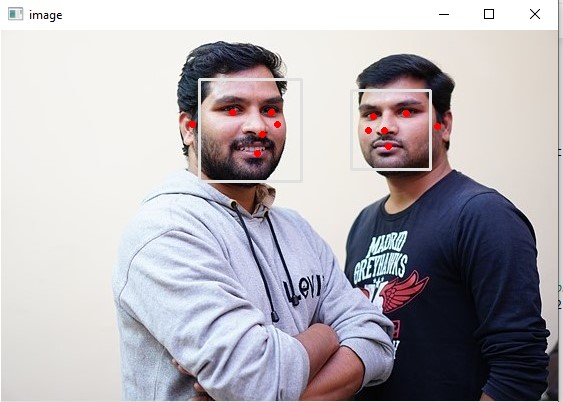

## For Webcam Input

In [12]:
mp_face_detection = mp.solutions.face_detection

mp_drawing = mp.solutions.drawing_utils


cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture("Video/smilegirl-2.mp4")

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        success, image = cap.read()
        
#         if not success:
#             print("Ignoring empty camera frame")
#             continue

        if success == True:
            # To improve performance, optionally mark the image as not writeable to pass by reference.
            image.flags.writeable = False
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            results = face_detection.process(image=image)

            # Draw the face detection annotations on the image.
            image.flags.writeable = True
            
            image = cv2.cvtColor(src=image, code=cv2.COLOR_RGB2BGR)

            if results.detections:
                for detection in results.detections:
                    mp_drawing.draw_detection(image=image, detection=detection)

            # Flip the image horizontally for a selfie-view display.
            #cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
            
            resize_img = cv2.resize(src=image, dsize=(700, 700))
            
            cv2.imshow(winname='MediaPipe Face Detection', mat=resize_img)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
        
cap.release()
cv2.destroyAllWindows()

## MediaPipe Face Mesh

In [16]:
mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

mp_face_mesh = mp.solutions.face_mesh.FaceMesh()

# Init signature:
# mp_drawing.DrawingSpec(
#     color: Tuple[int, int, int] = (224, 224, 224),
#     thickness: int = 2,
#     circle_radius: int = 2,
# ) -> None

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)



<IPython.core.display.Javascript object>